Aluno: **PAULO EDUARDO GUEDES PETER**

**Q1.** Como você avalia os dados deste dataset. Existem valores NULOS? Se sim,
quantos e quais. Demonstre.

**R: O dataset possui 457 entradas.** 

**Exitem 84 valores nulos na coluna 'College', pois esta coluna possui 373 valores não nulos de um total de 457 entradas.** 

**E existem 11 valores nulos na coluna 'Salary' ,pois esta possui 446 valores não nulos de um total de 457 entradas.** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nba = pd.read_csv('/content/nba.csv')
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


**Q2.** Qual o time com a maior e a menor folha de pagamento?

**Maior: Cleveland Cavaliers - 	106988689.0**

**Menor: Philadelphia 76ers	-    30992894.0**

a. E quais são as médias das alturas dos atletas dos times? Algum time se
destaca?

**Maior média: Toronto Raptors  - 6.6673 (6'7)**

b. O que você pode utilizar para encontrar se a média de algum time está
muito discrepante?

**Utilizei um Boxplot contendo os times e suas alturas para poder visualizar os outliers, assim podendo analisar se há ou não discrepância.**

In [ ]:
# preparar dados de agregação para os calculos
agregacao = {
    'Salary': ['sum']
}

folha = nba.groupby('Team').agg(agregacao).round()
folha.max() #106988689.0 - CAVS
folha.min() # 30992894.0 - 76ers
folha


In [ ]:
# Transformando o Campo de str para float
nba['Height'] = nba['Height'].astype(float)

mediaAltura = nba.groupby('Team').Height.mean()
mediaAltura.max() # Toronto Raptors  - 6.6673
mediaAltura.min() # Brooklyn Nets - 6.348
mediaAltura

<Axes: xlabel='Height', ylabel='Team'>

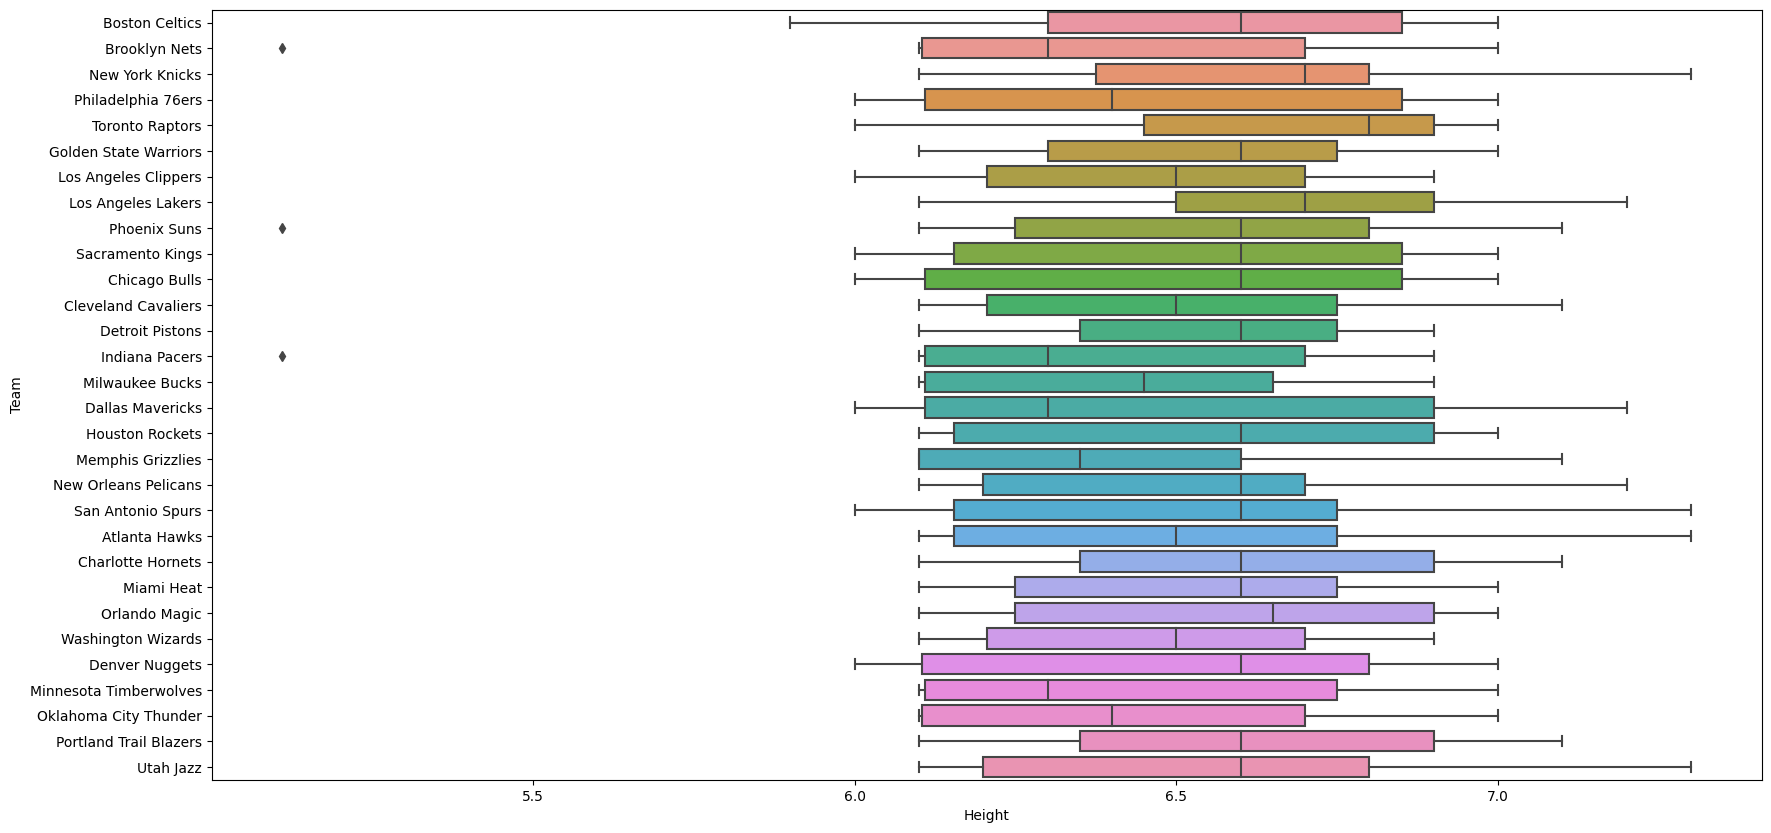

In [ ]:
grafico1 = sns.boxplot(x='Height',y='Team', data=nba,orient='h')
grafico1.figure.set_size_inches(20,10)
grafico1

**Q3.** Com relação a posição dos atletas, apresente a distribuição de frequência
deste parâmetro (absoluta e percentual). 

Apresente também o histograma
com a linha de distribuição de frequência para estes dados. 

Apresente uma análise sobre o resultado do diagrama gerado.

**Analisando os dados podemos dizer que a posição que possui o maior número de 
atletas da NBA é a de SG: Shooting Guard (ala-armador);**

**E a posição com o menor nú mero de atletas na NBA é a de C: Center (pivô).**

In [ ]:
absoluta = pd.value_counts(nba.Position)
print(f'Frequencia Absoluta: \n{absoluta}')


Frequencia Absoluta: 
SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64


In [ ]:
relativa = pd.value_counts(nba.Position, normalize=True)
print(f'Frequencia Relativa % : \n{relativa}')

Frequencia Relativa % : 
SG    0.223195
PF    0.218818
PG    0.201313
SF    0.185996
C     0.170678
Name: Position, dtype: float64


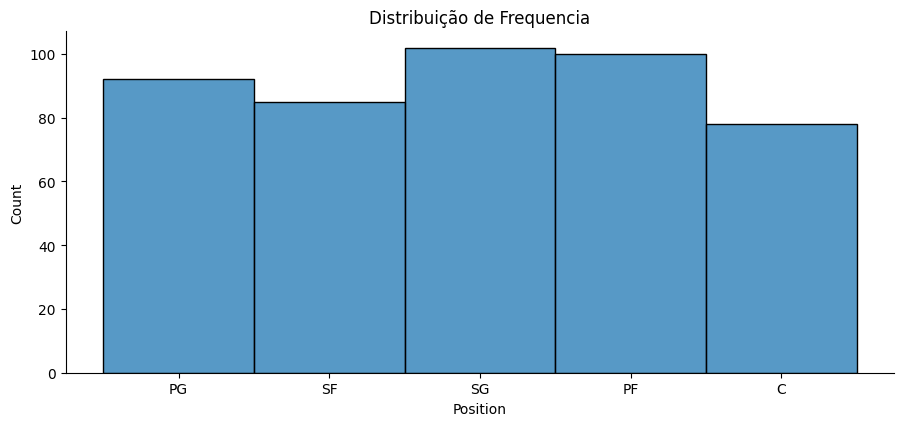

In [ ]:
gAbsoluta = sns.displot(nba.Position)
gAbsoluta.ax.set_title('Distribuição de Frequencia')
gAbsoluta.figure.set_size_inches(10,4) 

**Q4.** Faça uma segmentação da base de dados com base na idade dos atletas.


Para esta atividade deve ser realizada uma classificação fixa onde: o menor
valor é 18 o maior valor é 45 e a amplitude das classes é 3. 

Apresentar a informação de idade utilizando os gráficos de boxplot e histograma (com linha de distribuição de frequência). 

Realizar uma breve análise dos
resultados obtidos.

**Podemos constatar ,através da análise das idades , que em sua maiorira os atletas da NBA tem idade entre 20 e 33 anos.**

Amplitude das classes: 7.00


Text(0.5, 0.98, 'Distribuição de Frequência')

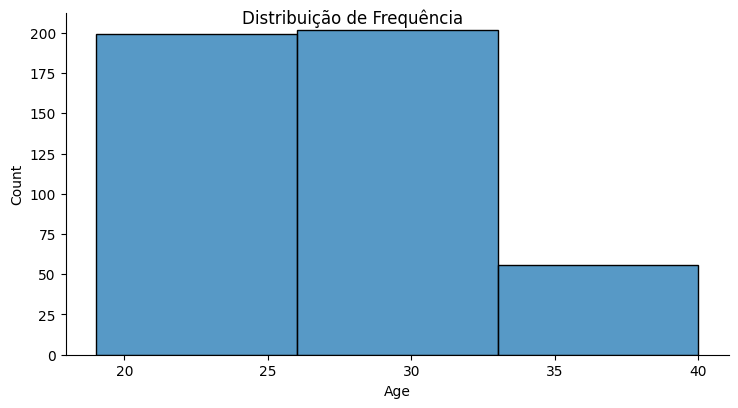

In [ ]:
idade = nba.Age
idadeMinima = idade.min() # 19 anos
idadeMaxima = idade.max() # 40 anos
aTotal = idadeMaxima - idadeMinima # 21 anos
#Qtde. Colunas
k = 3
aClasses = aTotal / k
print(f'Amplitude das classes: {aClasses:.2f}')

g2 = sns.displot(nba.Age,bins=k)
g2.figure.set_size_inches(8,4)
g2.fig.suptitle('Distribuição de Frequência')



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


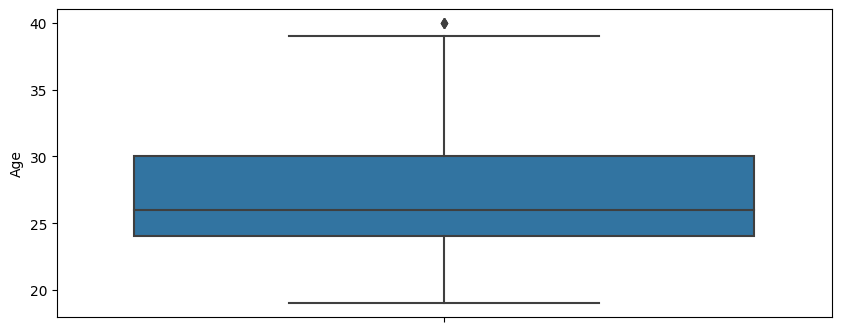

In [ ]:
g3 = sns.boxplot(y='Age', data=nba,orient='h')
g3.figure.set_size_inches(10,4)


**Q5.** Apresentar a média do salário mensal dos atletas agrupados por equipe e
posição. Após apresentar um gráfico de histograma com os valores médios
dos salários.



Team                Position
Atlanta Hawks       C           7585417.0
                    PF          5988067.0
                    PG          4881700.0
                    SF          3000000.0
                    SG          2607758.0
                                  ...    
Washington Wizards  C           8163476.0
                    PF          5650000.0
                    PG          9011208.0
                    SF          2789700.0
                    SG          2839248.0
Name: Salary, Length: 149, dtype: float64


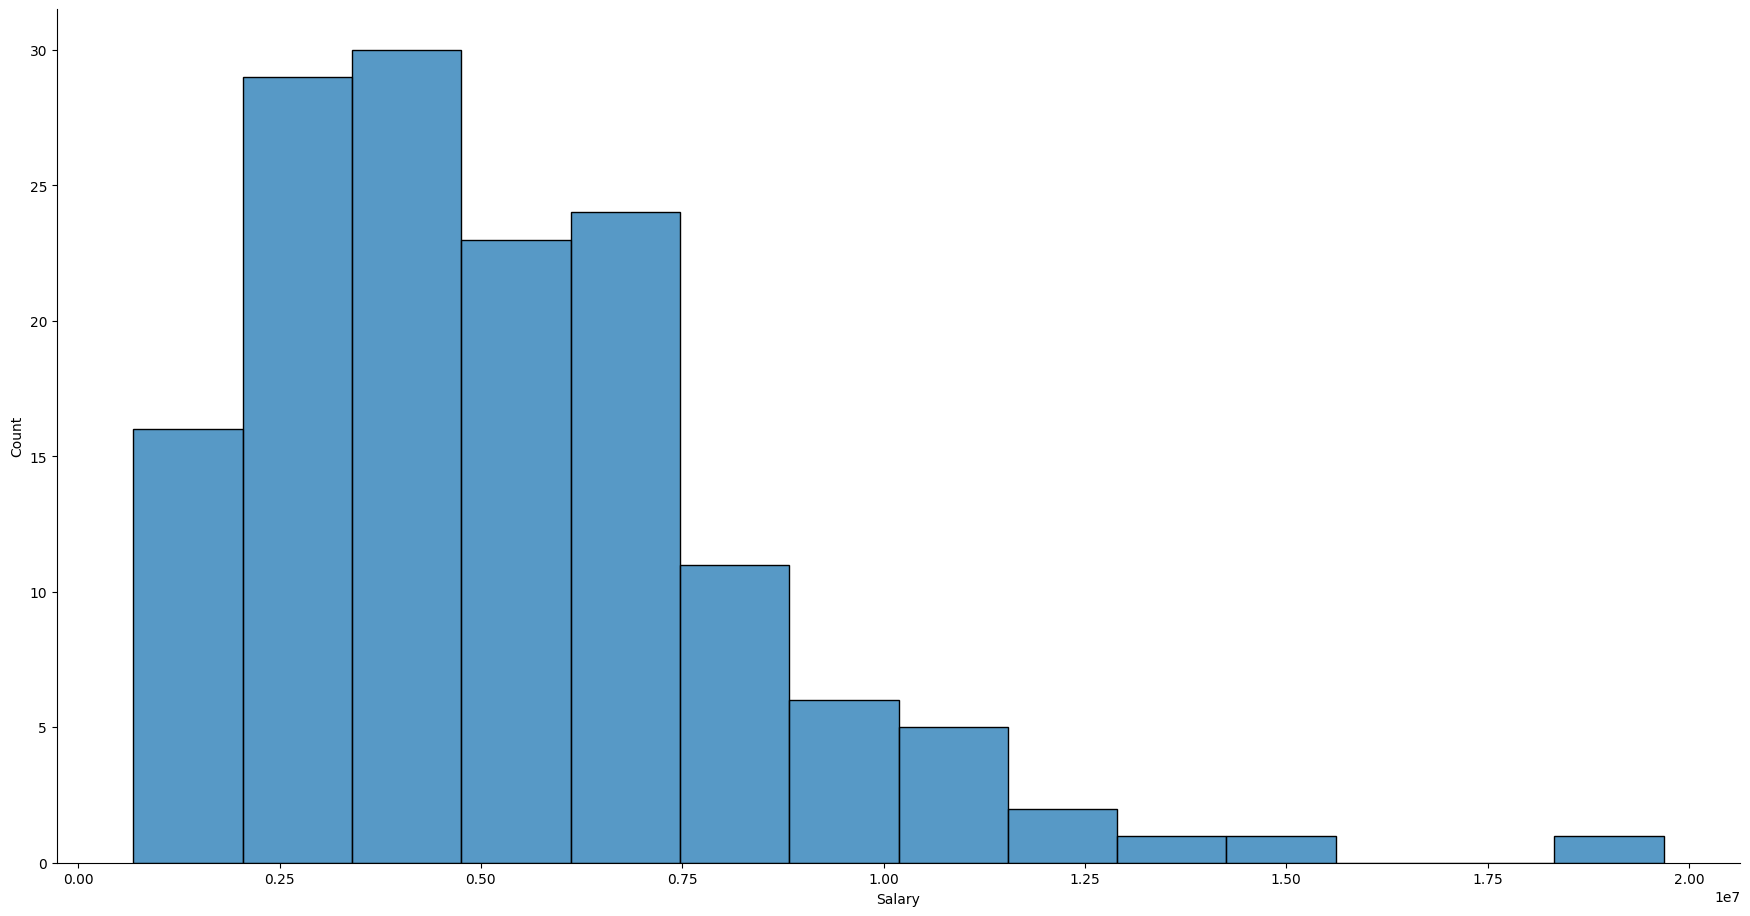

In [ ]:
mediaSalario = nba.groupby(['Team','Position']).Salary.mean().round()
print(mediaSalario)

g4 = sns.displot(mediaSalario)
g4.figure.set_size_inches(20,10)

**Q6.** Prepare tabelas que apresentem a frequência dos atletas relacionando as
informações de Altura, Peso por Posição. 

Após construa um gráfico boxplot
com as informações de peso e altura. 

Com estas duas informações apresente
uma análise relacionada a estes dois atributos.


DICA: utilizar a função de agregação ‘count’.

Observação: o gráfico gerado nesta questão deve ter um aspecto conforme a
imagem apresentada a seguir:


,Height,Weight
,count,count
Position,,
C,78,78
PF,100,100
PG,92,92
SF,85,85
SG,102,102


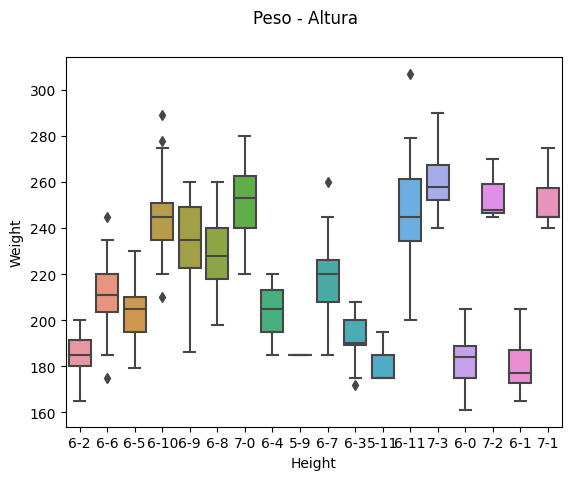

In [47]:
import pandas as pd
import seaborn as sns
nba = pd.read_csv('/content/nba.csv')

agg_Altura_Peso = {
    'Height':['count'],
    'Weight':['count']
}

tabela = nba.groupby('Position').agg(agg_Altura_Peso)
tabela

g5 = sns.boxplot(x='Height',y='Weight',data=nba,orient='vertical')
g5.figure.suptitle('Peso - Altura')
g5

tabela